In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

In [ ]:
gsheet = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTmmFhlJP0j2dk9Wa6yyK9iZB1T2LHphXZiRVqknTSV6OYxzrnPamGsGQiICzkSpbgXBAGTiUtm40JP/pub?output=csv"
df = pd.read_csv(gsheet,decimal='.')
vin_t = df["vin 2"].to_numpy()
vout_t = df["vout 2"].to_numpy()
def lineal(x, m, b):
  y = m*x+b
  return y
v_err_t = df['escala (V)'].to_numpy()/6



χ² pond= 1.386
χ² NO pond= 0.006
R² = 1.006
r_p = 1.000


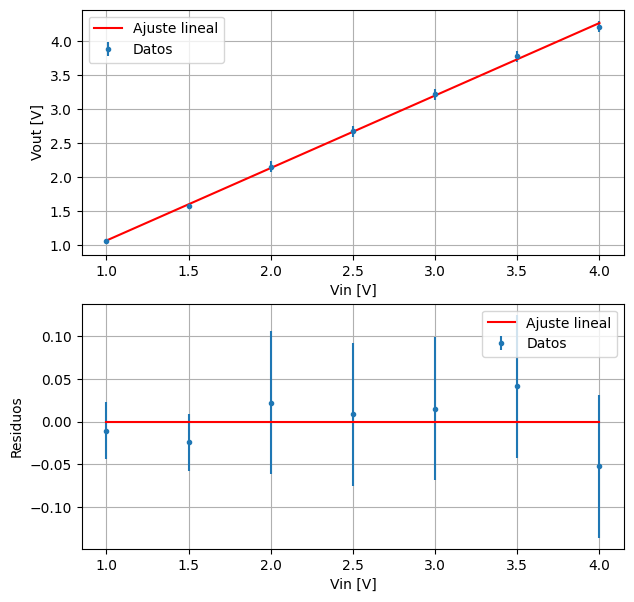

In [ ]:
#recorto datos
def cortarlista(lista_entera):
  lista_cortada = lista_entera[:7]
  return lista_cortada

vin= cortarlista(vin_t)
vout= cortarlista(vout_t)
v_err= cortarlista(v_err_t)

#ajusto
p, cov = curve_fit(lineal, vin, vout)
err = np.sqrt(np.diag(cov))
y_fit = lineal(vin, p[0], p[1])
plt.figure(figsize=(7,7))
ax1 = plt.subplot(2,1,1)
plt.errorbar(vin, vout, yerr=v_err, fmt=".", label="Datos")
plt.plot(vin, y_fit, "-", color="red", label = "Ajuste lineal")
plt.xlabel("Vin [V]"), plt.ylabel("Vout [V]")
plt.grid(), plt.legend()

plt.subplot(2,1,2, sharex=ax1)
plt.errorbar(vin, vout-y_fit, yerr=v_err, fmt='.', label="Datos")
plt.plot(vin, y_fit*0, "-", color="red", label = "Ajuste lineal")
plt.xlabel("Vin [V]"), plt.ylabel("Residuos")
plt.grid(), plt.legend()

#Métricas de bondad del ajuste
#buscando chi2
x = vin
y = vout
y_aj = y_fit
ey = v_err # error de la variable independiente

res_sq = (y - y_aj) ** 2 #un χ² NO ponderado
ss = res_sq/(ey**2) #un χ² ponderado, considera mas relevante a las medidas mas precisas

ch2_pond = np.sum(ss) #pond
ch2_NOpond= np.sum(res_sq)

#χ² pond= 1.3863857141811222 hasta el dato 7 sin incluirlo, seria vpp = 4
#χ² NO pond= 0.9859796651078581 hasta el dato 22 sin incluirlo, seria vpp=14

#buscando R²
v_prom= np.mean(vout)
denom= (y - v_prom) ** 2
frac= res_sq/denom
R_2= np.sum(frac)

# pearson
from scipy.stats import pearsonr
rp = pearsonr(x, y)[0]

print(f'χ² pond= {ch2_pond:.3f}')
print(f'χ² NO pond= {ch2_NOpond:.3f}')
print(f'R² = {R_2:.3f}')
print(f'r_p = {rp:.3f}')
